### Import Statements

In [1]:
# General-purpose libraries
import os  # For interacting with the operating system
import glob  # For finding file paths with wildcards
import shutil  # For high-level file operations
import random
import time

In [2]:
# Image processing libraries
import cv2  # OpenCV library for computer vision tasks
import PIL  # Python Imaging Library for image processing
from PIL import Image, ImageOps  # Specific PIL modules for image manipulation
import numpy as np  # NumPy for numerical operations on arrays

In [3]:
# Data visualization libraries
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # Seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Matplotlib for basic plotting

In [4]:
# Scientific image processing libraries
from skimage import data  # Various sample images from skimage
from skimage.util import montage  # Creating a collage from images
import skimage.transform as skTrans  # Image transformation utilities
from skimage.transform import rotate, resize  # Specific image transformation functions

In [5]:
# Neuroimaging libraries
import nilearn as nl  # Nilearn for neuroimaging data analysis
import nilearn.plotting as nlplt  # Nilearn's plotting utilities
import nibabel as nib  # For reading and writing neuroimaging data in NIfTI format

In [6]:
# Deep learning libraries
import keras  # High-level deep learning library
import tensorflow as tf  # TensorFlow for deep learning
from tensorflow.keras.utils import plot_model  # For visualizing Keras models
from sklearn.preprocessing import MinMaxScaler  # For data scaling
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.metrics import classification_report  # For model evaluation metrics

In [7]:
# Keras and TensorFlow specific modules for neural network models
from keras.callbacks import CSVLogger  # Callback for logging training progress in CSV format
import keras.backend as K  # Keras backend for custom operations
from tensorflow.keras import Sequential
from tensorflow.keras.models import *  # Various model architectures
from tensorflow.keras.layers import *  # Different types of neural network layers
from tensorflow.keras.optimizers import *  # Optimizers for training models
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.layers.experimental import preprocessing  # Experimental preprocessing layers for TensorFlow

# Set print options for NumPy
np.set_printoptions(precision=3, suppress=True)

In [22]:
import segmentation_models_3D as sm3d

Segmentation Models: using `tf.keras` framework.


ModuleNotFoundError: No module named 'keras.engine'

In [24]:
from keras.engine import training

ModuleNotFoundError: No module named 'keras.engine'

In [12]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

In [16]:
# Setting the environment variable 'SM_FRAMEWORK' to 'tf.keras' to use TensorFlow Keras backend.
%env SM_FRAMEWORK=tf.keras

env: SM_FRAMEWORK=tf.keras


In [14]:
tf.keras.backend.set_image_data_format('channels_last')
from mpl_toolkits.axes_grid1 import ImageGrid

from torch.utils.data import Dataset
from keras.models import load_model
from tensorflow.keras import utils as np_utils

In [15]:
from segmentation_models import Unet, Linknet, PSPNet, FPN
from segmentation_models.utils import set_trainable

In [17]:
TRAIN_DATASET_PATH = 'BraTS2020_TrainingData/'

In [18]:
SEGMENT_CLASSES = {
    0 : 'NOT tumor',
    1 : 'NECROTIC/CORE', #RED
    2 : 'EDEMA',  #Green
    3 : 'ENHANCING' #Yellow
}

In [19]:
VOLUME_SLICES = 100
VOLUME_START_AT = 22

IMG_SIZE=128

In [20]:
ID="BraTS20_Training_002"
files=os.listdir(TRAIN_DATASET_PATH+"/"+ID)
files

['BraTS20_Training_002_flair.nii',
 'BraTS20_Training_002_seg.nii',
 'BraTS20_Training_002_t1.nii',
 'BraTS20_Training_002_t1ce.nii',
 'BraTS20_Training_002_t2.nii']

In [21]:
_t1=nib.load(TRAIN_DATASET_PATH+"/"+ID+"/"+files[0]).get_fdata()
_flair=nib.load(TRAIN_DATASET_PATH+"/"+ID+"/"+files[1]).get_fdata()
_t1ce=nib.load(TRAIN_DATASET_PATH+"/"+ID+"/"+files[2]).get_fdata()
_t2=nib.load(TRAIN_DATASET_PATH+"/"+ID+"/"+files[3]).get_fdata()
_mask=nib.load(TRAIN_DATASET_PATH+"/"+ID+"/"+files[4]).get_fdata()

In [22]:
# Shape of the data
print("t1: ",_t1.shape)
print("flair:",_flair.shape)
print("t1ce:",_t1ce.shape)
print("t2:",_t2.shape)
print("mask:",_mask.shape)

t1:  (240, 240, 155)
flair: (240, 240, 155)
t1ce: (240, 240, 155)
t2: (240, 240, 155)
mask: (240, 240, 155)


Text(0.5, 1.0, 'Mask')

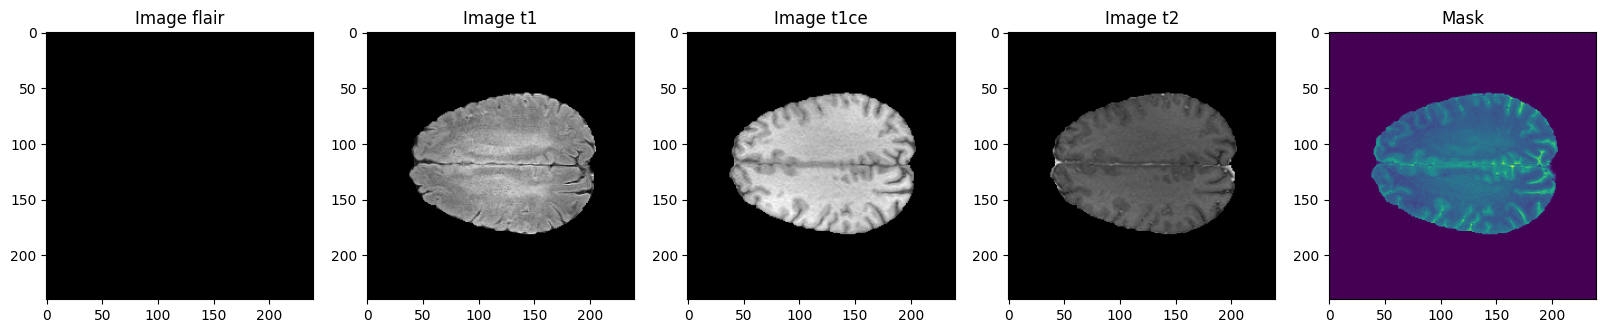

In [23]:
# Display images from different channel
slices=95

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 10))

ax1.imshow(_flair[:,:,slices],cmap='gray')
ax1.set_title('Image flair')

ax2.imshow(_t1[:,:,slices],cmap='gray')
ax2.set_title('Image t1')

ax3.imshow(_t1ce[:,:,slices],cmap='gray')
ax3.set_title('Image t1ce')

ax4.imshow(_t2[:,:,slices],cmap='gray')
ax4.set_title('Image t2')

ax5.imshow(_mask[:,:,slices])
ax5.set_title('Mask')

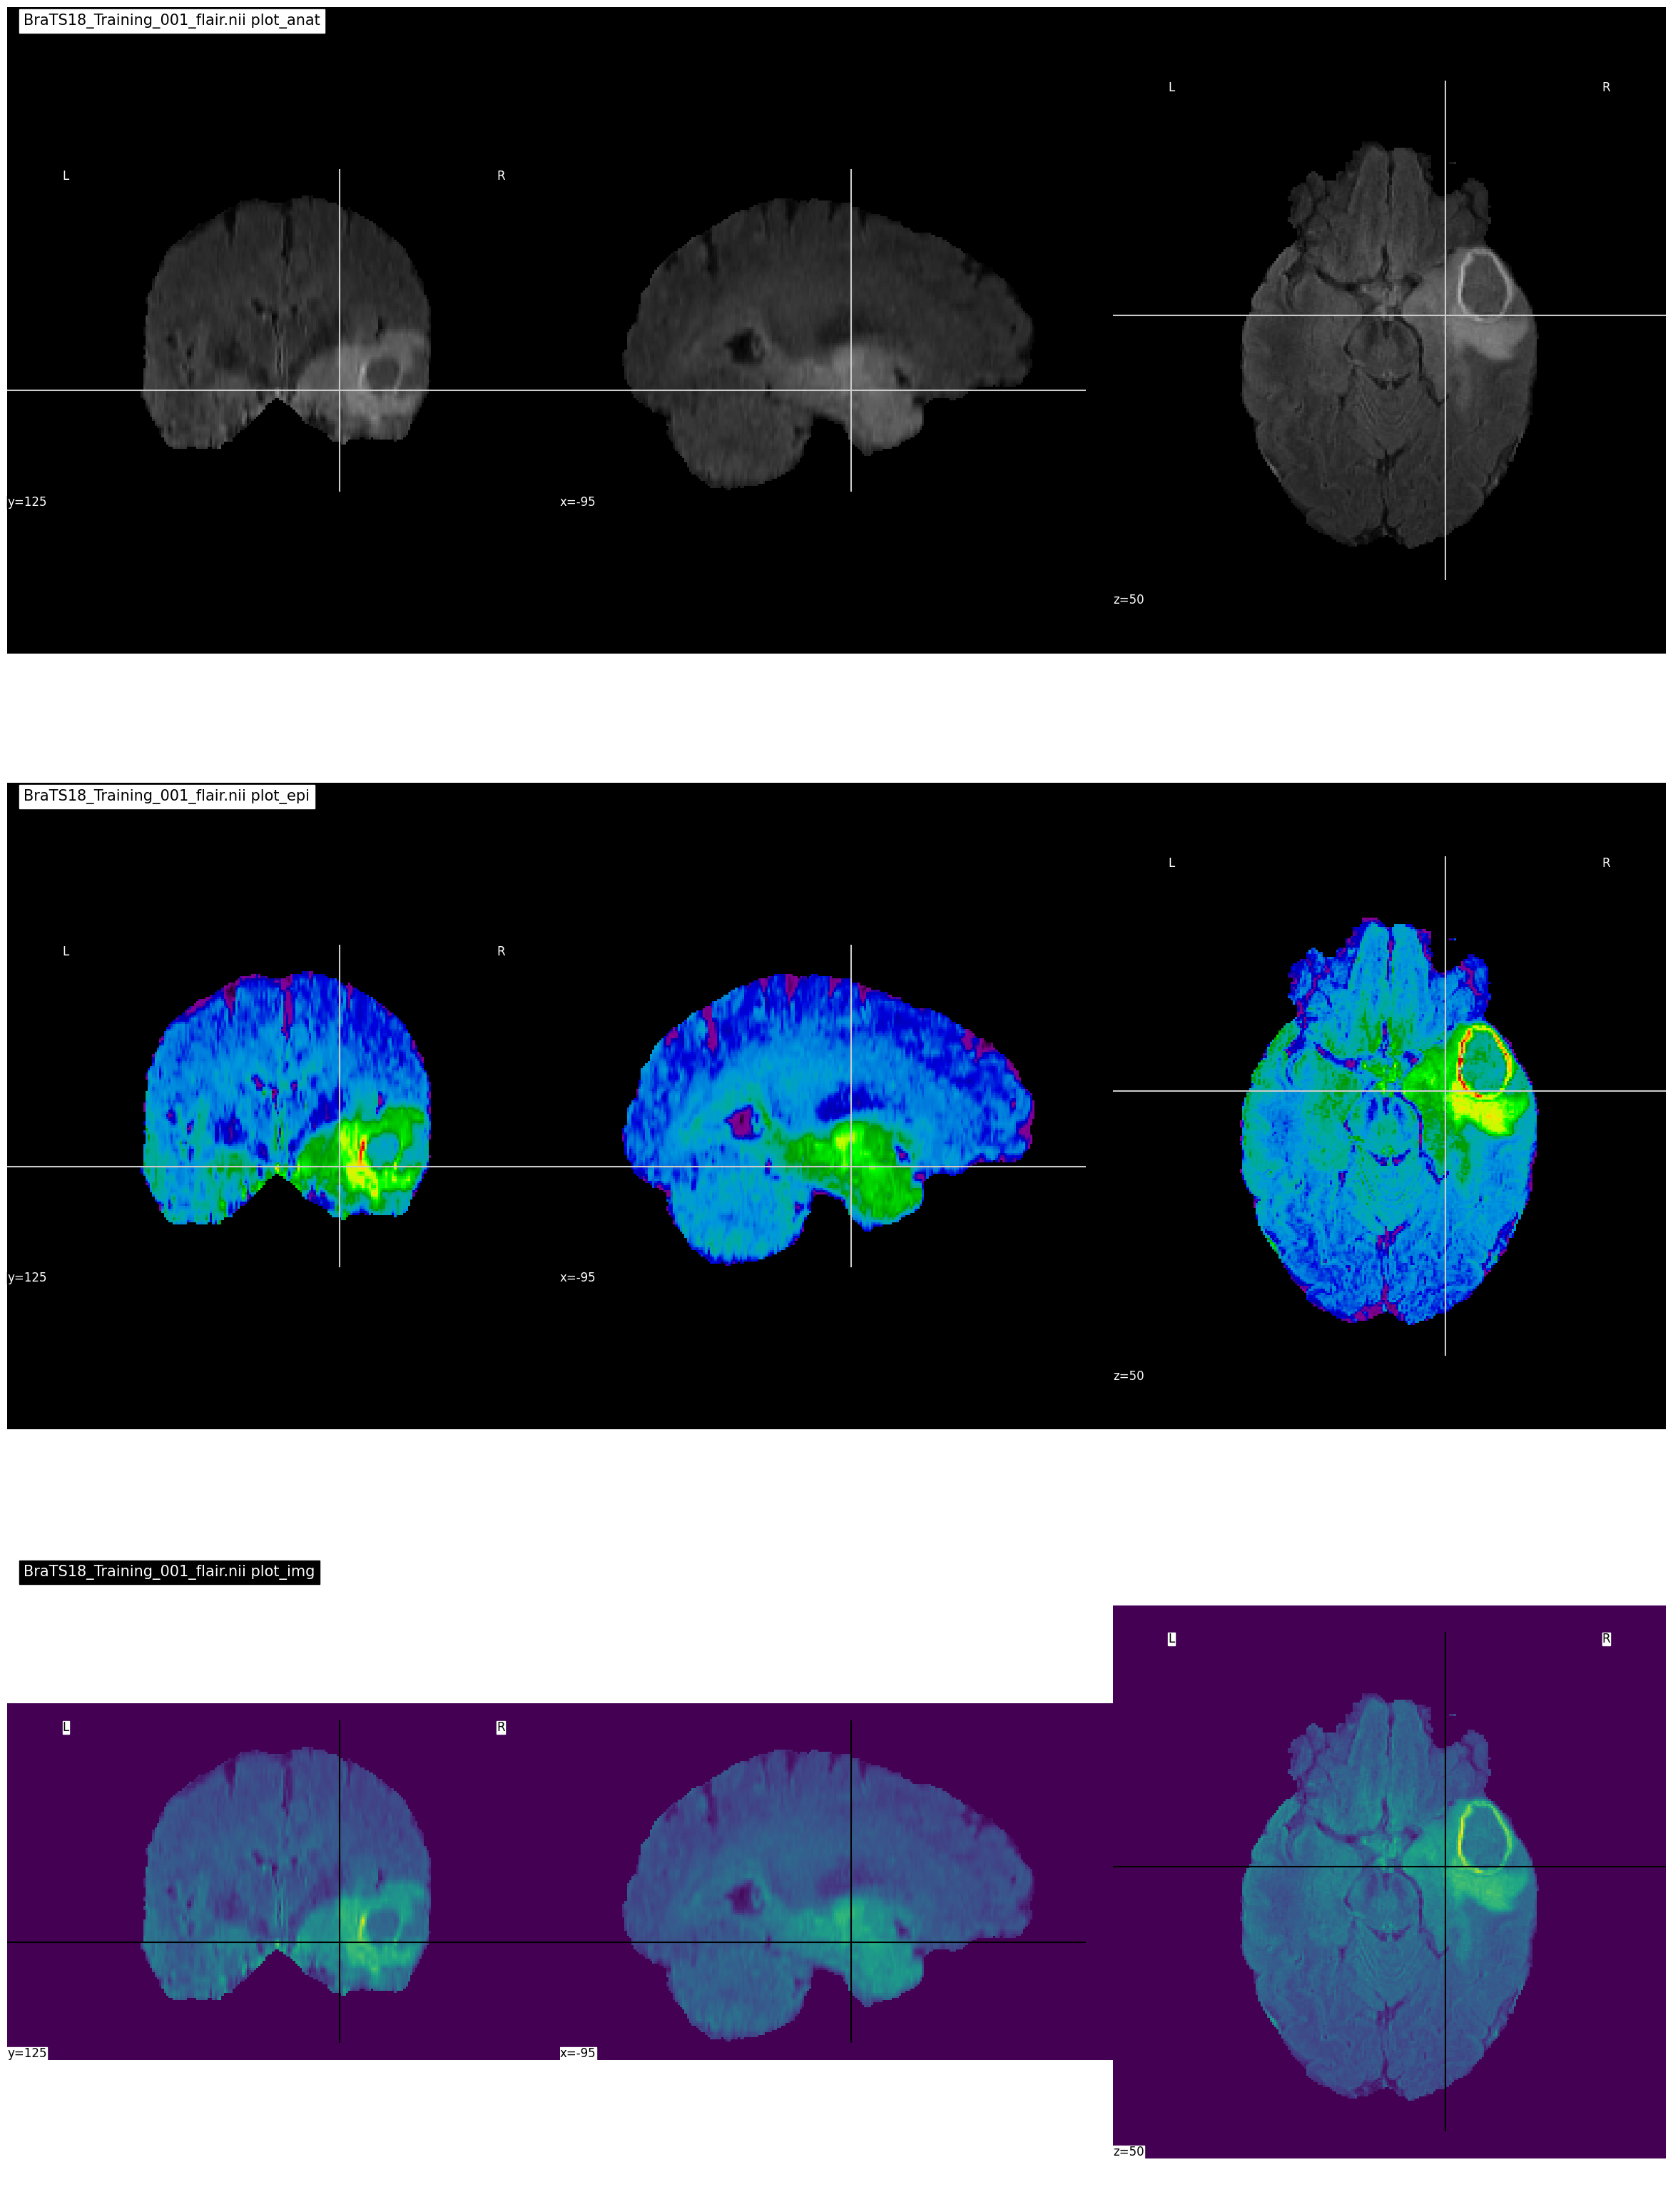

In [24]:
niimg = nl.image.load_img(TRAIN_DATASET_PATH+"/"+ID+"/"+files[0])


fig, axes = plt.subplots(nrows=3, figsize=(30, 40))

#plot anatomical images
#visualize the brain's structural anatomy.
# Anatomical images typically refer to high-resolution structural MRI
nlplt.plot_anat(niimg,
                title='BraTS18_Training_001_flair.nii plot_anat',
                axes=axes[0])

#plot EPI (Echo Planar Imaging) images
#used in tasks like fMRI resting-state analysis and activation mapping..
nlplt.plot_epi(niimg,
               title='BraTS18_Training_001_flair.nii plot_epi',
               axes=axes[1])

nlplt.plot_img(niimg,
               title='BraTS18_Training_001_flair.nii plot_img',
               axes=axes[2])

plt.show()

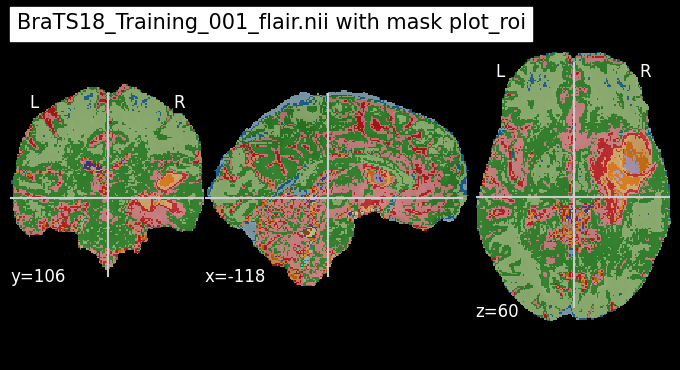

In [25]:
nimask = nl.image.load_img(TRAIN_DATASET_PATH+"/"+ID+"/"+files[4])
#plot regions of interest (ROIs) on top of neuroimaging data.
#ROIs are specific brain regions that are of interest for analysis.
#This function helps to visually highlight these regions on the brain image.
nlplt.plot_roi(nimask,
               title='BraTS18_Training_001_flair.nii with mask plot_roi',
               bg_img=niimg,
               cmap='Paired')

plt.show()

In [26]:
t2_list = sorted([file for root, dirs, files in os.walk(TRAIN_DATASET_PATH) for file in glob.glob(os.path.join(root, '*t2.nii'))])
t1ce_list = sorted([file for root, dirs, files in os.walk(TRAIN_DATASET_PATH) for file in glob.glob(os.path.join(root, '*t1ce.nii'))])
flair_list = sorted([file for root, dirs, files in os.walk(TRAIN_DATASET_PATH) for file in glob.glob(os.path.join(root, '*flair.nii'))])
mask_list = sorted([file for root, dirs, files in os.walk(TRAIN_DATASET_PATH) for file in glob.glob(os.path.join(root, '*seg.nii'))])

In [27]:
def create_directory_if_not_exists(directory_path):
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
        print(f"Directory '{directory_path}' created.")
    else:
        print(f"Directory '{directory_path}' already exists.")


create_directory_if_not_exists("/working/images")
create_directory_if_not_exists("/working/masks")

create_directory_if_not_exists("/working/val/images")
create_directory_if_not_exists("/working/val/masks")

Directory '/working/images' created.
Directory '/working/masks' created.
Directory '/working/val/images' created.
Directory '/working/val/masks' created.


In [28]:
t2_img= nib.load(t2_list[0]).get_fdata()
t2_img.shape

(240, 240, 155)

In [29]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical


scaler = MinMaxScaler()

rnge =len(t2_list)
rnge = 40

for i in range (rnge):
    t2_img= nib.load(t2_list[i]).get_fdata()
    t2_img = scaler.fit_transform(t2_img.reshape(-1,t2_img.shape[-1])).reshape(t2_img.shape)

    t1ceimg= nib.load(t1ce_list[i]).get_fdata()
    t1ceimg= scaler.fit_transform(t1ceimg.reshape(-1,t1ceimg.shape[-1])).reshape(t1ceimg.shape)

    flair_img= nib.load(flair_list[i]).get_fdata()
    flair_img=scaler.fit_transform(flair_img.reshape(-1,flair_img.shape[-1])).reshape(flair_img.shape)


    mask_img= nib.load(mask_list[i]).get_fdata()
    mask_img = mask_img.astype(np.uint8)
    mask_img[mask_img==4] = 3


    #combile three channel into one image
    comb_img = np.stack([t2_img,t1ceimg,flair_img],axis=3)

    comb_img = comb_img[56:184,56:184,13:141]
    mask_img = mask_img[56:184,56:184,13:141]

    val,counts = np.unique(mask_img,return_counts=True)

    #counts[0] = count of background pixel (0)

    if (1 - (counts[0]/counts.sum())) > 0.01: #ratio of non-background in total image> 0.01
        mask_img = to_categorical(mask_img,num_classes=4)

        #train-val split
        if i%10 ==0:
            np.save('/working/val/images/image_'+str(i)+'.npy',comb_img)
            np.save('/working/val/masks/mask_'+str(i)+'.npy',mask_img)
        else:
            np.save('/working/images/image_'+str(i)+'.npy',comb_img)
            np.save('/working/masks/mask_'+str(i)+'.npy',mask_img)

In [35]:
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):
        if (image_name.split('.')[1] == 'npy'):

            image = np.load(img_dir+image_name)

            images.append(image)
    images = np.array(images)

    return(images)

In [36]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):
    L = len(img_list)

    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)

            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples

            batch_start += batch_size
            batch_end += batch_size

In [37]:
train_img_dir = "/working/images/"
train_mask_dir = "/working/masks/"

train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

val_img_dir = "/working/val/images/"
val_mask_dir ="/working/val/masks/"

val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)
batch_size = 2

In [33]:
train_img_datagen = imageLoader(train_img_dir,
                                train_img_list,
                                train_mask_dir,
                                train_mask_list,
                                batch_size)

val_img_datagen = imageLoader(val_img_dir,
                              val_img_list,
                              val_mask_dir,
                              val_mask_list,
                              batch_size)

In [56]:
# # Loss functions
dice_loss = sm3d.losses.DiceLoss()
focal_loss = sm3d.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

NameError: name 'sm3d' is not defined

In [ ]:
# Matrix
metrics = ['accuracy', sm3d.metrics.IOUScore(threshold=0.5)]

In [ ]:
# Optimizer
LR = 0.0001
optim = keras.optimizers.Adam(LR)
steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size

In [48]:
# Build Model
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.metrics import MeanIoU
kernel_initializer =  'he_uniform'

In [49]:
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    s = inputs

    #Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)

    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)

    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)

    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)

    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)

    #Expansive path
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)

    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)

    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)

    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)

    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model
model = simple_unet_model(IMG_HEIGHT=128,
                          IMG_WIDTH=128,
                          IMG_DEPTH=128,
                          IMG_CHANNELS=3,
                          num_classes=4)

In [ ]:
#compile model outside of this function to make it flexible.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d (Conv3D)                (None, 128, 128, 12  1312        ['input_1[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 12  0           ['conv3d[0][0]']                 
                                8, 16)                                                        

In [ ]:
model.compile(optimizer = optim, loss=total_loss, metrics=metrics)

In [ ]:
history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=30,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

Epoch 1/30


In [ ]:
model.save('mis_3d.hdf5')

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_img = np.load("/kaggle/working/val/images/image_10.npy")
test__img = np.expand_dims(test_img, axis=0)


test_mask = np.load("/kaggle/working/val/masks/mask_10.npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

In [ ]:
test_prediction = model.predict(test__img)
test_prediction=np.argmax(test_prediction, axis=4)[0,:,:,:]

In [ ]:
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask[:,:,n_slice],cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction[:,:, n_slice])
plt.show()